(np.float64(-0.5), np.float64(2087.5), np.float64(1549.5), np.float64(-0.5))

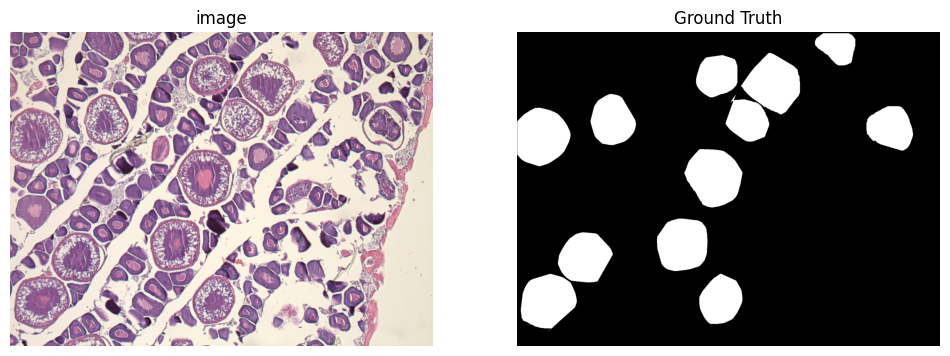

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def build_mask_from_xml(filename):   
    tree = ET.parse(filename)
    root = tree.getroot()
    width=int(root.get('width'))
    height=int(root.get('height'))
    # Create a black image with the specified dimensions
    img = np.zeros((height, width, 3), np.uint8)
    # all items data
    for region in root.iter('FreeHand'):
        lista=[]
        if region.get('VISIBLE') == '1':
            for point in region:
                x=int(point.get('x'))
                y=int(point.get('y'))
                lista.append([x,y])
                # Define an array of points
            points=np.array(lista)
            cv2.fillPoly(img, pts=[points], color=(255, 255, 255))
    return img

filename='pilchardTrue.xml'
gt = build_mask_from_xml(filename)
img = cv2.imread('pilchard.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axis = plt.subplots(1,2,figsize = (12,6))
axis[0].imshow(img)
axis[0].set_title('image')
axis[0].axis('off')
axis[1].imshow(gt, cmap = 'gray')
axis[1].set_title('Ground Truth')
axis[1].axis('off')


In [12]:
k = np.ones((3,3))
pred = cv2.erode(gt,k)

In [14]:
def compute_truth_values(gt, pred):
    # c11
    tn = np.count_nonzero((gt == 0) & (gt == pred))
    # c22
    tp = np.count_nonzero((gt == 255) & (gt == pred))
    # c12
    fp = np.count_nonzero((gt == 0) & (gt != pred))
    # c21
    fn = np.count_nonzero((gt == 255) & (gt != pred))
    return tn,tp,fp,fn

def compute_confusion_matrix(tn,tp,fp,fn):
    return np.array([[tn, tp],[fn, fp]])
# Accuracy, kappa, precision, recall, F1

def compute_metrics(cmatrix):
    s=np.sum(cmatrix); pa=np.trace(cmatrix); pe=0
    for i in range(cmatrix.shape[0]):
        pe = pe + np.sum(cmatrix[:,i])*np.sum(cmatrix[i,:])/s  
    accuracy = 100*pa/s 
    kappa = 100*(pa-pe)/(s-pe)
    recall = cmatrix[1,1]/(cmatrix[1,0]+cmatrix[1,1]) 
    precision = cmatrix[1,1]/(cmatrix[0,1]+cmatrix[1,1])
    dice = 2*precision*recall/(precision + recall)
    iou = cmatrix[1,1]/(cmatrix[1,1]+cmatrix[0,1]+cmatrix[1,0])
    return accuracy,kappa, recall,precision,dice,iou

tn,tp,fp,fn = compute_truth_values(gt,pred)
cmatrix = compute_confusion_matrix(tn,tp,fp,fn)
accuracy,kappa, recall,precision,dice,iou = compute_metrics(cmatrix)


C:\Users\ulloa\AppData\Local\Temp\ipykernel_23796\3951696754.py:24: RuntimeWarning: invalid value encountered in scalar divide
  dice = 2*precision*recall/(precision + recall)


In [16]:
print('Accuracy = %.2f, kappa = %.2f\n'%(accuracy, kappa))
print('Precision= %0.3f, recall = %.3f, F1=%.3f\n'%(precision, recall, dice))
print('IoU=%0.3f, Dice=%0.3f\n'%iou, dice)
npixels=gt.size

Accuracy = 83.14, kappa = -0.72

Precision= 0.000, recall = 0.000, F1=nan



TypeError: not enough arguments for format string